<a href="https://colab.research.google.com/github/moridin04/CCDATSCL_COM221ML_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [2]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


In [13]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

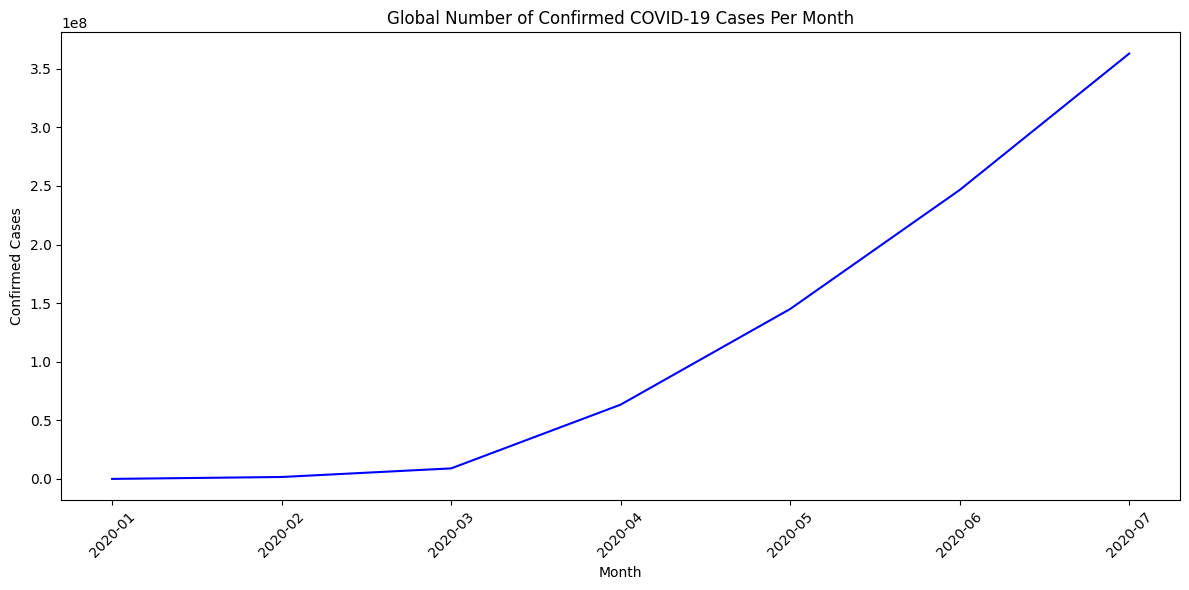

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#Categorizing "Date" data by month
grouped = df.groupby(df['Date'].dt.to_period('M'))["Confirmed"].sum().reset_index() #monthly
grouped['Date'] = grouped['Date'].astype(str)

#Showing Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x="Date", y="Confirmed", color="blue")
plt.title("Global Number of Confirmed COVID-19 Cases Per Month")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

/tmp/ipython-input-1809890274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'])


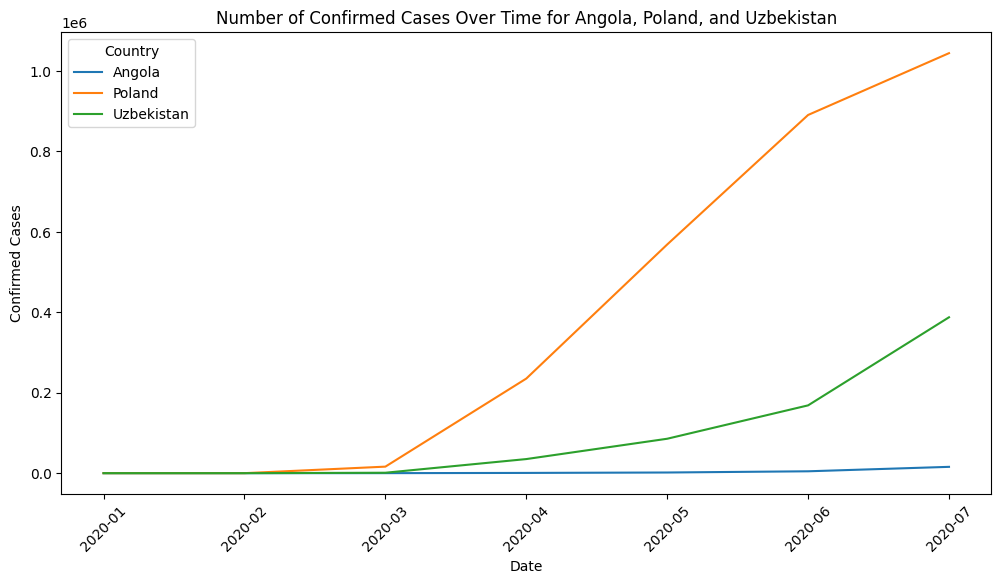

In [20]:
#Angola, Uzbekistan, Poland

df_selected = df[df['Country/Region'].isin(['Angola', 'Uzbekistan', 'Poland'])]
df_selected['Date'] = pd.to_datetime(df_selected['Date'])
grouped = df_selected.groupby(['Country/Region', df_selected['Date'].dt.to_period('M')])['Confirmed'].sum().reset_index()
grouped['Date'] = grouped['Date'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Date', y='Confirmed', hue='Country/Region')
plt.title('Number of Confirmed Cases Over Time for Angola, Poland, and Uzbekistan')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

In [ ]:
# put your answer here

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

In [ ]:
# put your answer here

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

In [ ]:
# put your answer here

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [ ]:
# put your answer here

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [ ]:
# put your answer here